<a href="https://colab.research.google.com/github/DTAMBU/Data-Science-Project-Tuberculosis/blob/main/Data_Science_Project_Tuberculosis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Project: Tuberculosis<br>
Url: XXXX<br>
Google Colab: https://colab.research.google.com/drive/1PHE2bGd1YHUXVcxGlzK02yS8Lp_5UrvB#scrollTo=x5HdsZ2TooLN<br>

For this work, 2 different information sources are used, shown below, to extract datasets that will be jointly analyzed:

https://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG?most_recent_value_desc=true

https://www.who.int/teams/global-tuberculosis-programme/data

The “geopandas” library will also be used to create geographic plots. To use the library, proceed to load the “ne_110m_admin_0_countries.zip” file also available along with the datasets.

The idea of this report is to generate a working methodology and use several of the Data Analysis tools commonly used in the performance of the data scientist’s activity.


In [ ]:
# Install geopandas
!pip install geopandas==0.13.2

In [ ]:
# Necessary libraries are imported
import os
import numpy as np
import pandas as pd

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Loading and analysis of the first Dataframe

In [ ]:
path1  = "https://raw.githubusercontent.com/DTAMBU/Data_Analysis/main/res/gdp-per-capita-worldbank.csv"

In [ ]:
# Load the file into a DataFrame
df1 = pd.read_csv(path1, encoding='latin1', sep=',')
print(df1.sample())

       Entity Code  Year  GDP per capita, PPP (constant 2017 international $)
932  Cambodia  KHM  2013                                           3197.532  


In [ ]:
# Columns are renamed for easier reading
df1 = df1.rename(columns={'Entity': 'Country', 'GDP per capita, PPP (constant 2017 international $)': 'GDP'})
display(df1.sample(1))

Country Code  Year        GDP
924  Cambodia  KHM  2005  2124.8374

In [ ]:
# Get a statistical summary
df1.describe()

Year            GDP
count  6346.000000    6346.000000
mean   2005.937914   18068.999300
std       9.126633   20193.547754
min    1990.000000     436.376400
25%    1998.000000    3673.792850
50%    2006.000000   10486.217500
75%    2014.000000   26409.074000
max    2021.000000  157602.480000

In [ ]:
# Get general information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6346 entries, 0 to 6345
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  6346 non-null   object 
 1   Code     5930 non-null   object 
 2   Year     6346 non-null   int64  
 3   GDP      6346 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 198.4+ KB


In [ ]:
# Calculate the number of unique values
unique_values_Countries = df1['Country'].nunique()
print('Unique values of Countries:', unique_values_Countries)
unique_values_Codes = df1['Code'].nunique()
print('Unique values of Codes:', unique_values_Codes)

Unique values of Countries: 208
Unique values of Codes: 195


In [ ]:
# Select the rows of the DataFrame where the 'Code' column has null values and print the counts according to 'Country' column
null_rows_df1 = df1[df1['Code'].isnull()]
print(null_rows_df1['Country'].value_counts().sort_values(ascending=False))

East Asia and Pacific (WB)           32
Europe and Central Asia (WB)         32
European Union (27)                  32
High-income countries                32
Latin America and Caribbean (WB)     32
Low-income countries                 32
Lower-middle-income countries        32
Middle East and North Africa (WB)    32
Middle-income countries              32
North America (WB)                   32
South Asia (WB)                      32
Sub-Saharan Africa (WB)              32
Upper-middle-income countries        32
Name: Country, dtype: int64


In [ ]:
# Remove rows that contain null values
df1 = df1.dropna()

In [ ]:
# Calculate the number of unique values
unique_values_Countries = df1['Country'].nunique()
print('Unique values of Countries:', unique_values_Countries)
unique_values_Codes = df1['Code'].nunique()
print('Unique values of Codes:', unique_values_Codes)

Unique values of Countries: 195
Unique values of Codes: 195


In [ ]:
# Check if there is any null value in the DataFrame
df1.isnull().values.any()

False

## Use of the Geopandas library

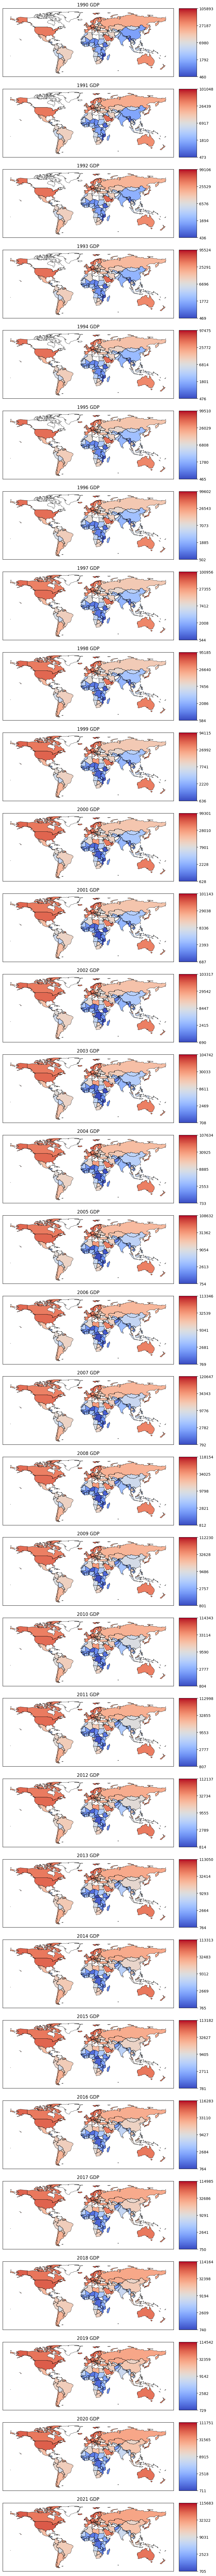

In [ ]:
# Define the path to the file
geo_path = "https://raw.githubusercontent.com/DTAMBU/Data_Analysis/main/res/ne_110m_admin_0_countries.zip"

# Load the local file into a GeoDataFrame
world = gpd.read_file(geo_path)

# Exclude Antarctica
world = world[world['NAME'] != 'Antarctica']

# Get the unique years in the DataFrame
years = np.sort(df1['Year'].unique())

# Filter df to only contain country codes that exist in world['BRK_A3']
df = df1[df1['Code'].isin(world['BRK_A3'])]

# Define a function to plot a map
def plot_map(ax, year, df, world):
    # Select the data for a specific year
    df_year = df1[df1['Year'] == year]

    # Ensure that 'world' and 'df_year' are aligned
    world_year = world.set_index('BRK_A3').join(df_year.set_index('Code'))

    # Draw a map of the world
    world.boundary.plot(ax=ax, color='black', linewidth=0.5)  # Adjust the thickness of the lines here

    # Remove the numerical labels on both axes
    ax.set_xticks([])
    ax.set_yticks([])

    # Create a divider for the current axis
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="10%", pad=0.1)

    # Draw the map and add the legend
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=np.log(world_year['GDP']).min(), vmax=np.log(world_year['GDP']).max()))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax, format='')

    # Set the color bar labels
    ticks = np.linspace(np.log(world_year['GDP']).min(), np.log(world_year['GDP']).max(), num=5)  # Adjust 'num' according to your needs
    cbar.set_ticks(ticks)
    cbar.set_ticklabels(np.exp(ticks).astype(int))  # Convert the labels back to the original scale (non-logarithmic)

    world_year.plot(ax=ax, column=np.log(world_year['GDP']), legend=False, cmap='coolwarm')

    # Add a title to the plot
    ax.set_title(f'{year} GDP')

# Apply the function to each year
fig, axs = plt.subplots(len(years), 1, figsize=(10, len(years)*3))

# Ensure that axs is always a 1-D array
if len(axs.shape) == 2:
    axs = axs.flatten()

# Iterate only over the axes that correspond to the existing years
for ax, year in zip(axs, years):
    plot_map(ax, year, df, world)

# Automatically adjust the space between the subplots
plt.tight_layout()
# Show the plot
plt.show()

## Graphs as a function of time

- Four countries are selected and the GDP is plotted over time. It is observed that, for example, Canada does not have data for all the years, which is why in the Geopandas graph, some countries appear white depending on the year.

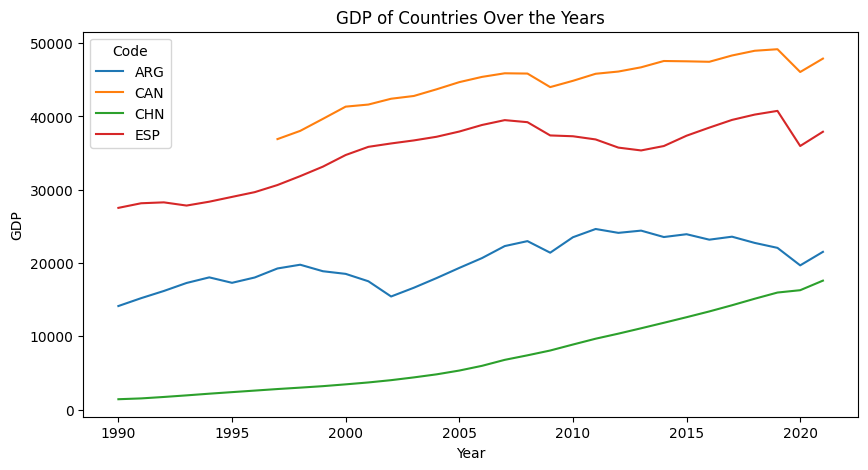

In [ ]:
# Ignore FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# Filter the DataFrame to include only the countries you are interested in
df_filtered = df1[df1['Code'].isin(['CAN', 'CHN', 'ESP', 'ARG'])]

# Create a figure
plt.figure(figsize=(10, 5))

# Create the plot on the plot
sns.lineplot(data=df_filtered, x='Year', y='GDP', hue='Code')

# Add a title to the plot
plt.title('GDP of Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP')

# Show the figure
plt.show()

- In the following section, it is detailed which countries do not have data for the entire range of years.

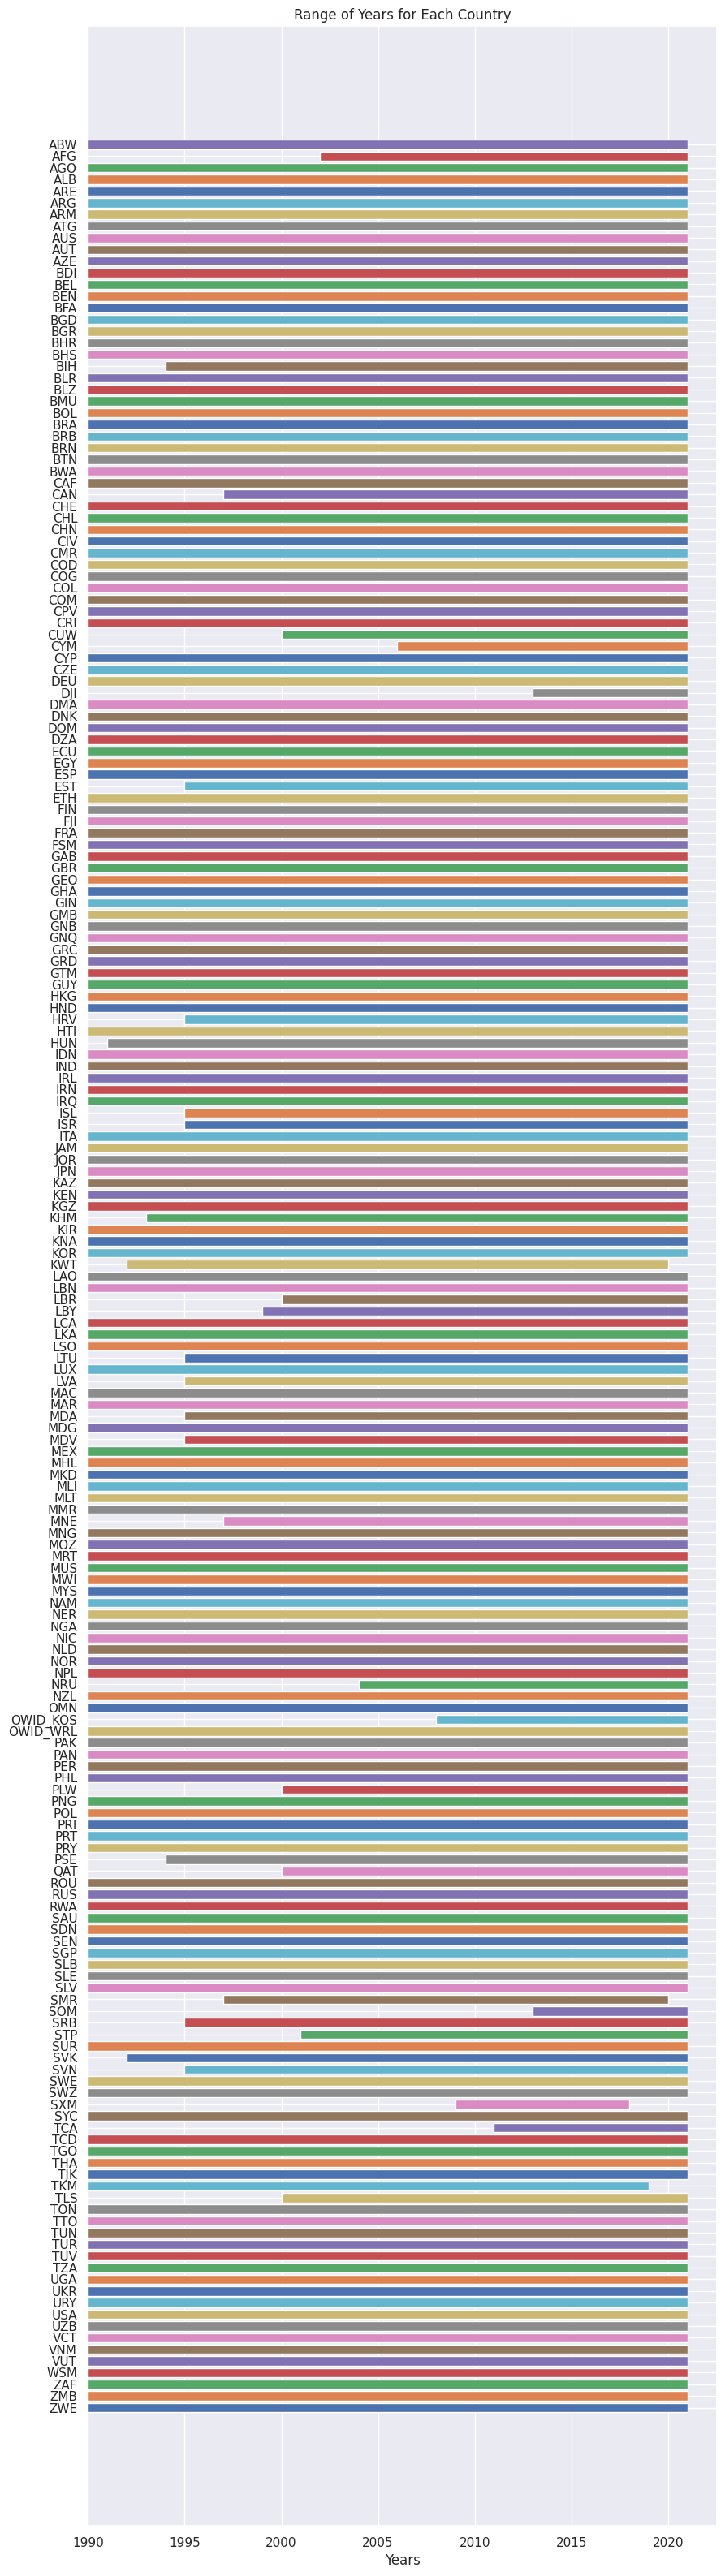

In [ ]:
# Create a list of the codes of all countries
countries = df1['Code'].unique()

# Filter the DataFrame to include only the countries you are interested in
df_filtered = df1[df1['Code'].isin(countries)]

# Find the range of years for each country
years_range_per_country = {country: (df_filtered[df_filtered['Code'] == country]['Year'].min(), df_filtered[df_filtered['Code'] == country]['Year'].max()) for country in countries}

# Create lists for the ranges of years and the countries
years_ranges = [range for range in years_range_per_country.values()]
countries = [country for country in years_range_per_country.keys()]

# Sort the countries alphabetically and then reverse the order
countries, years_ranges = zip(*sorted(zip(countries, years_ranges), reverse=True))

# Create a figure and an axis with a custom size
fig, ax = plt.subplots(figsize=(10, 40))

# Draw each range of years for each country
for i in range(len(countries)):
    ax.barh(i, years_ranges[i][1]-years_ranges[i][0], left=years_ranges[i][0])

# Set the labels of the y-axis
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)

# Set the labels of the x-axis
plt.xlabel('Years')

# Set the title
plt.title('Range of Years for Each Country')

# Show the plot
plt.show()


## Loading and analysis of the second Dataframe

In [ ]:
# Define the path to the file
path2 = "https://raw.githubusercontent.com/DTAMBU/Data_Analysis/main/res/TB_burden_countries_2024-01-13.csv"

In [ ]:
# Load the file into a DataFrame
df2 = pd.read_csv(path2, sep=',')
display(df2.sample(1))

country iso2 iso3  iso_numeric g_whoregion  year  e_pop_num  \
733  Burkina Faso   BF  BFA          854         AFR  2020   21522626   

     e_inc_100k  e_inc_100k_lo  e_inc_100k_hi  ...   cfr  cfr_lo  cfr_hi  \
733        46.0           30.0           66.0  ...  0.22    0.12    0.35   

     cfr_pct  cfr_pct_lo  cfr_pct_hi  c_newinc_100k  c_cdr  c_cdr_lo  c_cdr_hi  
733     22.0        12.0        35.0           26.0   58.0      40.0      89.0  

[1 rows x 50 columns]

In [ ]:
# Select only desired columns
df2 = df2[['iso3', 'year', 'e_inc_100k','cfr_pct']]

In [ ]:
# Rename the columns for easier reading
df2 = df2.rename(columns={'iso3': 'Code', 'year': 'Year', 'e_inc_100k': 'Incidence', 'cfr_pct': 'Fatality%'})
display(df2.sample(5))

Code  Year  Incidence  Fatality%
4046  SVN  2013        7.7        6.0
3918  SRB  2013       27.0        6.0
196   ARG  2012       24.0        8.0
1630  FRA  2007       11.0       12.0
2676  MDV  2018       33.0        7.0

In [ ]:
# Get a statistical summary
df2.describe()

Year    Incidence    Fatality%
count  4917.000000  4917.000000  4794.000000
mean   2011.040065   123.046766    16.327701
std       6.627437   184.816404    13.444558
min    2000.000000     0.000000     0.000000
25%    2005.000000    12.000000     8.000000
50%    2011.000000    46.000000    11.000000
75%    2017.000000   161.000000    22.000000
max    2022.000000  1590.000000   100.000000

In [ ]:
# Get general information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4917 entries, 0 to 4916
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code       4917 non-null   object 
 1   Year       4917 non-null   int64  
 2   Incidence  4917 non-null   float64
 3   Fatality%  4794 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 153.8+ KB


In [ ]:
# Select the rows of the DataFrame where the 'Budget' column has null values and print the counts according to 'Code' column
null_rows_df2 = df2[df2['Fatality%'].isnull()]
print(null_rows_df2['Code'].value_counts().sort_values(ascending=False))

SMR    20
MSR    18
NIU    16
TKL    15
MCO     9
VGB     8
BMU     6
KNA     6
COK     5
WLF     5
CYM     4
BRB     4
GRD     2
SXM     2
ATG     1
TCA     1
ASM     1
Name: Code, dtype: int64


In [ ]:
# Remove rows that contain null values
df2 = df2.dropna()

## Loading and analysis of the third Dataframe

In [ ]:
# Define the path to the file
path3 = "https://raw.githubusercontent.com/DTAMBU/Data_Analysis/main/res/TB_budget_2024-01-13.csv"

In [ ]:
# Load the file into a DataFrame
df3 = pd.read_csv(path3, sep=',')
display(df3.sample(1))

country iso2 iso3  iso_numeric g_whoregion  \
986  Saint Vincent and the Grenadines   VC  VCT          670         AMR   

     year  tx_dstb  budget_cpp_dstb  tx_mdr  budget_cpp_mdr  ...  cf_orsrvy  \
986  2020      NaN              NaN     NaN             NaN  ...        NaN   

     budget_oth  cf_oth  budget_tot  cf_tot  cf_tot_domestic  cf_tot_gf  \
986         NaN     NaN         NaN     NaN              NaN        NaN   

     cf_tot_usaid  cf_tot_grnt  cf_tot_sources  
986           NaN          NaN             NaN  

[1 rows x 43 columns]

In [ ]:
# Select only desired columns
df3 = df3[['iso3', 'year','budget_tot']]

In [ ]:
# Rename the columns for easier reading
df3 = df3.rename(columns={'iso3': 'Code', 'year': 'Year', 'budget_tot': 'Budget'})
display(df3.sample(5))

Code  Year     Budget
648  LSO  2018  3318438.0
539  ISL  2023        NaN
530  HUN  2020  2100000.0
985  VCT  2019        NaN
414  FJI  2018   646195.0

In [ ]:
# Get a statistical summary
df3.describe()

Year        Budget
count  1290.000000  8.280000e+02
mean   2020.500000  4.821886e+07
std       1.708487  1.619825e+08
min    2018.000000  0.000000e+00
25%    2019.000000  1.200075e+06
50%    2020.500000  6.380376e+06
75%    2022.000000  2.665690e+07
max    2023.000000  1.640128e+09

In [ ]:
# Get general information
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    1290 non-null   object 
 1   Year    1290 non-null   int64  
 2   Budget  828 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.4+ KB


In [ ]:
# Select the rows of the DataFrame where the 'Budget' column has null values and print the counts according to 'Code' column
null_rows_df3 = df3[df3['Budget'].isnull()]
print(null_rows_df3['Code'].value_counts().sort_values(ascending=False))

QAT    6
TTO    6
BEL    6
BMU    6
AUT    6
      ..
LVA    1
AND    1
SDN    1
PRK    1
ALB    1
Name: Code, Length: 115, dtype: int64


In [ ]:
# Remove rows that contain null values
df3 = df3.dropna()

## Merge of the Dataframes

In [ ]:
# Merge the DataFrames df1, df2, and df3 based on the columns 'Code' and 'Year'
combined_df = df1.merge(df2, on=['Code', 'Year']).merge(df3, on=['Code', 'Year'])
display(combined_df)

Country Code  Year         GDP  Incidence  Fatality%      Budget
0    Afghanistan  AFG  2018   2060.6990      189.0       16.0  10881354.0
1    Afghanistan  AFG  2019   2079.9219      189.0       14.0  16957452.0
2    Afghanistan  AFG  2020   1968.3410      183.0       15.0  19137128.0
3    Afghanistan  AFG  2021   1516.3057      185.0       14.0  10633599.0
4        Albania  ALB  2018  13319.4950       18.0        2.0         0.0
..           ...  ...   ...         ...        ...        ...         ...
496       Zambia  ZMB  2021   3236.7890      307.0       14.0  37755340.0
497     Zimbabwe  ZWE  2018   2399.6216      210.0       15.0  29583804.0
498     Zimbabwe  ZWE  2019   2203.3967      199.0       22.0  41313083.0
499     Zimbabwe  ZWE  2020   1990.3195      185.0       24.0  31504677.0
500     Zimbabwe  ZWE  2021   2115.1445      194.0       25.0  32126351.0

[501 rows x 7 columns]

In [ ]:
# Check if there is any null value in the DataFrame
combined_df.isnull().values.any()

False

## Creation of Pivot Table

In [ ]:
# Create a pivot table from the DataFrame combined_df
# The values of 'GDP', 'Incidence', 'Fatality%', and 'Budget' are grouped by 'Year' and 'Country'
pivot1 = combined_df.pivot_table(values=['GDP', 'Incidence', 'Fatality%', 'Budget'], index=['Year', 'Country'])
display(pivot1)

Budget  Fatality%         GDP  Incidence
Year Country                                                   
2018 Afghanistan   10881354.0       16.0   2060.6990      189.0
     Albania              0.0        2.0  13319.4950       18.0
     Angola        45881526.0       21.0   6878.5933      355.0
     Argentina      5189232.0        7.0  22747.2420       27.0
     Armenia        6828768.0        6.0  13231.4310       31.0
...                       ...        ...         ...        ...
2021 Uruguay        4253647.0       12.0  22800.6900       32.0
     Vanuatu         527709.0       18.0   2783.0195       34.0
     Vietnam      132975703.0        7.0  10628.2190      165.0
     Zambia        37755340.0       14.0   3236.7890      307.0
     Zimbabwe      32126351.0       25.0   2115.1445      194.0

[501 rows x 4 columns]

In [ ]:
# Create a pivot table from the DataFrame combined_df
# The values of 'GDP', 'Incidence', 'Fatality%', and 'Budget' are grouped by 'Country' and 'Year'
# Calculate the mean, max, and min for each group
pivot2 = combined_df.pivot_table(values=['GDP', 'Incidence', 'Fatality%', 'Budget'],
                                 index=['Country', 'Year'],
                                 aggfunc=['mean', 'max', 'min'])
display(pivot2)

mean                                         max  \
                      Budget Fatality%         GDP Incidence      Budget   
Country     Year                                                           
Afghanistan 2018  10881354.0      16.0   2060.6990     189.0  10881354.0   
            2019  16957452.0      14.0   2079.9219     189.0  16957452.0   
            2020  19137128.0      15.0   1968.3410     183.0  19137128.0   
            2021  10633599.0      14.0   1516.3057     185.0  10633599.0   
Albania     2018         0.0       2.0  13319.4950      18.0         0.0   
...                      ...       ...         ...       ...         ...   
Zambia      2021  37755340.0      14.0   3236.7890     307.0  37755340.0   
Zimbabwe    2018  29583804.0      15.0   2399.6216     210.0  29583804.0   
            2019  41313083.0      22.0   2203.3967     199.0  41313083.0   
            2020  31504677.0      24.0   1990.3195     185.0  31504677.0   
            2021  32126351.0      25.0   2115.1445     194.0  32126351.0   

                                                         min            \
                 Fatality%         GDP Incidence      Budget Fatality%   
Country     Year                                                         
Afghanistan 2018      16.0   2060.6990     189.0  10881354.0      16.0   
            2019      14.0   2079.9219     189.0  16957452.0      14.0   
            2020      15.0   1968.3410     183.0  19137128.0      15.0   
            2021      14.0   1516.3057     185.0  10633599.0      14.0   
Albania     2018       2.0  13319.4950      18.0         0.0       2.0   
...                    ...         ...       ...         ...       ...   
Zambia      2021      14.0   3236.7890     307.0  37755340.0      14.0   
Zimbabwe    2018      15.0   2399.6216     210.0  29583804.0      15.0   
            2019      22.0   2203.3967     199.0  41313083.0      22.0   
            2020      24.0   1990.3195     185.0  31504677.0      24.0   
            2021      25.0   2115.1445     194.0  32126351.0      25.0   

                                        
                         GDP Incidence  
Country     Year                        
Afghanistan 2018   2060.6990     189.0  
            2019   2079.9219     189.0  
            2020   1968.3410     183.0  
            2021   1516.3057     185.0  
Albania     2018  13319.4950      18.0  
...                      ...       ...  
Zambia      2021   3236.7890     307.0  
Zimbabwe    2018   2399.6216     210.0  
            2019   2203.3967     199.0  
            2020   1990.3195     185.0  
            2021   2115.1445     194.0  

[501 rows x 12 columns]

## Other Analyses

In [ ]:
# Some columns are selected
df_selected = combined_df[['Country', 'Year', 'GDP', 'Incidence', 'Fatality%', 'Budget']]
display(df_selected)

Country  Year         GDP  Incidence  Fatality%      Budget
0    Afghanistan  2018   2060.6990      189.0       16.0  10881354.0
1    Afghanistan  2019   2079.9219      189.0       14.0  16957452.0
2    Afghanistan  2020   1968.3410      183.0       15.0  19137128.0
3    Afghanistan  2021   1516.3057      185.0       14.0  10633599.0
4        Albania  2018  13319.4950       18.0        2.0         0.0
..           ...   ...         ...        ...        ...         ...
496       Zambia  2021   3236.7890      307.0       14.0  37755340.0
497     Zimbabwe  2018   2399.6216      210.0       15.0  29583804.0
498     Zimbabwe  2019   2203.3967      199.0       22.0  41313083.0
499     Zimbabwe  2020   1990.3195      185.0       24.0  31504677.0
500     Zimbabwe  2021   2115.1445      194.0       25.0  32126351.0

[501 rows x 6 columns]

In [ ]:
# Group by 'Country' and calculate the mean of other columns across the years.
df_grouped1 = df_selected.groupby('Country')[['GDP', 'Incidence', 'Fatality%', 'Budget']].mean()
display(df_grouped1)

GDP  Incidence  Fatality%        Budget
Country                                                      
Afghanistan   1906.316900     186.50      14.75  1.440238e+07
Albania      13698.175333      16.00       2.00  5.430423e+05
Angola        6355.465575     340.25      19.25  4.051907e+07
Argentina    21507.850500      28.25       6.75  2.526782e+06
Armenia      13774.949500      26.75       6.50  4.364570e+06
...                   ...        ...        ...           ...
Uzbekistan    7082.925300      70.00       7.00  1.104770e+07
Vanuatu       2933.806625      39.50      15.75  3.916390e+05
Vietnam      10241.714750     173.25       7.25  8.626229e+07
Zambia        3304.687000     326.25      24.00  3.889813e+07
Zimbabwe      2177.120575     197.00      21.50  3.363198e+07

[141 rows x 4 columns]

In [ ]:
# Divide the values of the 'GDP' column into 5 equal-sized groups.
bins = pd.qcut(df_grouped1['GDP'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print(bins.value_counts())

Very Low     29
Low          28
Medium       28
High         28
Very High    28
Name: GDP, dtype: int64


In [ ]:
# Select rows from the 'df_grouped1' DataFrame where the values in the 'GDP' column are 'Very Low'
df_VeryLow = df_grouped1[bins == 'Very Low']
display(df_VeryLow)

GDP   Incidence  Fatality%        Budget
Country                                                                       
Afghanistan                   1906.316900  186.500000  14.750000  1.440238e+07
Benin                         3176.159175   54.500000  22.500000  3.558143e+06
Burkina Faso                  2108.700850   46.500000  21.000000  7.691302e+06
Burundi                        715.348050  103.333333  23.000000  6.842288e+06
Central African Republic       850.420990  540.000000  32.500000  2.962002e+06
Chad                          1510.055500  141.250000  23.750000  4.306927e+06
Comoros                       3292.741300   35.000000  28.000000  4.929895e+05
Democratic Republic of Congo  1056.463275  319.500000  19.000000  5.432168e+07
Ethiopia                      2205.354925  134.750000  16.000000  9.622103e+07
Guinea                        2565.330125  175.500000  18.250000  3.785495e+06
Guinea-Bissau                 1848.683433  361.000000  39.333333  2.617930e+06
Haiti                         3031.992500  167.250000  10.500000  1.177573e+07
Kiribati                      1976.545650  406.250000   9.500000  4.376662e+05
Lesotho                       2415.499800  635.750000  37.500000  1.005467e+07
Liberia                       1446.107225  308.000000  27.000000  8.166810e+06
Madagascar                    1510.657475  233.000000  21.000000  3.803587e+06
Malawi                        1494.215800  142.250000  30.250000  2.971530e+07
Mali                          2162.268425   51.500000  18.750000  6.325744e+06
Mozambique                    1259.458775  361.000000  11.500000  2.870273e+07
Niger                         1202.958725   83.000000  21.250000  4.939391e+06
Rwanda                        2137.110375   57.250000  15.000000  6.611477e+06
Sierra Leone                  1616.685300  293.500000  16.500000  1.101003e+07
Solomon Islands               2531.343200   65.500000  11.000000  9.752508e+05
Somalia                       1134.146833  254.000000  27.666667  9.391973e+06
Tanzania                      2555.384525  230.000000  25.500000  6.383039e+07
Togo                          2073.316175   35.750000  11.750000  1.074839e+06
Uganda                        2230.956600  199.500000  19.750000  3.455637e+07
Vanuatu                       2933.806625   39.500000  15.750000  3.916390e+05
Zimbabwe                      2177.120575  197.000000  21.500000  3.363198e+07

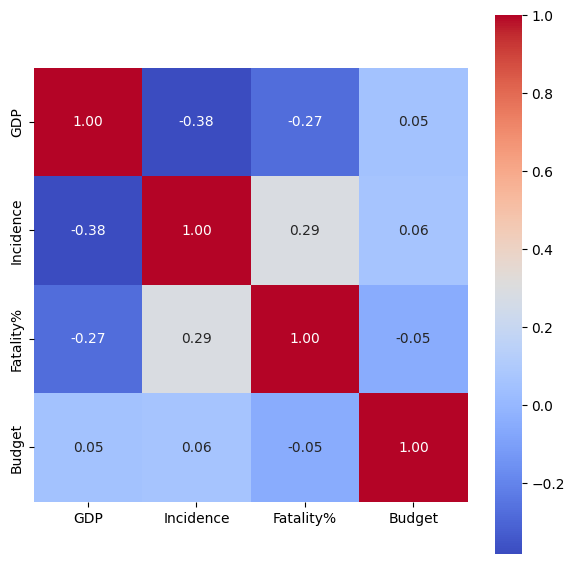

In [ ]:
# Calculate the correlation matrix for all data.
corr_matrix = df_grouped1.corr()
# Create a heatmap using seaborn.
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

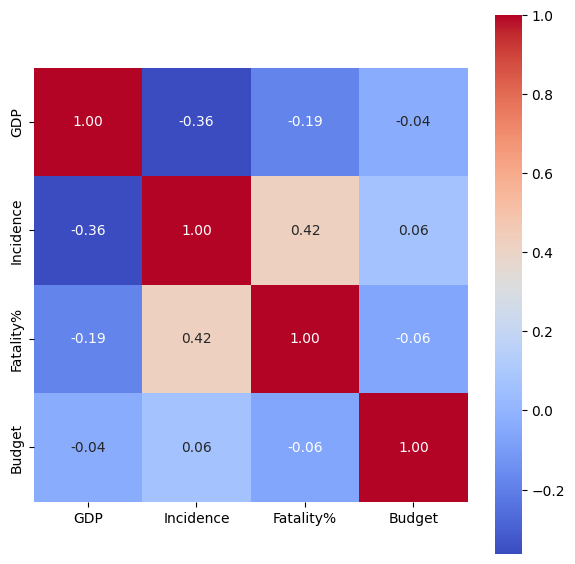

In [ ]:
# Calculate the correlation matrix for the group with 'Very Low' GDP
corr_matrix = df_VeryLow.corr()
# Create a heatmap using seaborn.
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.show()

In [ ]:
# Assign the values from the 'bins' variable to a new column called 'GDP_Level'
df_grouped1['GDP_Level'] = bins
display(df_grouped1)

GDP  Incidence  Fatality%        Budget  GDP_Level
Country                                                                 
Afghanistan   1906.316900     186.50      14.75  1.440238e+07   Very Low
Albania      13698.175333      16.00       2.00  5.430423e+05       High
Angola        6355.465575     340.25      19.25  4.051907e+07     Medium
Argentina    21507.850500      28.25       6.75  2.526782e+06  Very High
Armenia      13774.949500      26.75       6.50  4.364570e+06       High
...                   ...        ...        ...           ...        ...
Uzbekistan    7082.925300      70.00       7.00  1.104770e+07     Medium
Vanuatu       2933.806625      39.50      15.75  3.916390e+05   Very Low
Vietnam      10241.714750     173.25       7.25  8.626229e+07     Medium
Zambia        3304.687000     326.25      24.00  3.889813e+07        Low
Zimbabwe      2177.120575     197.00      21.50  3.363198e+07   Very Low

[141 rows x 5 columns]

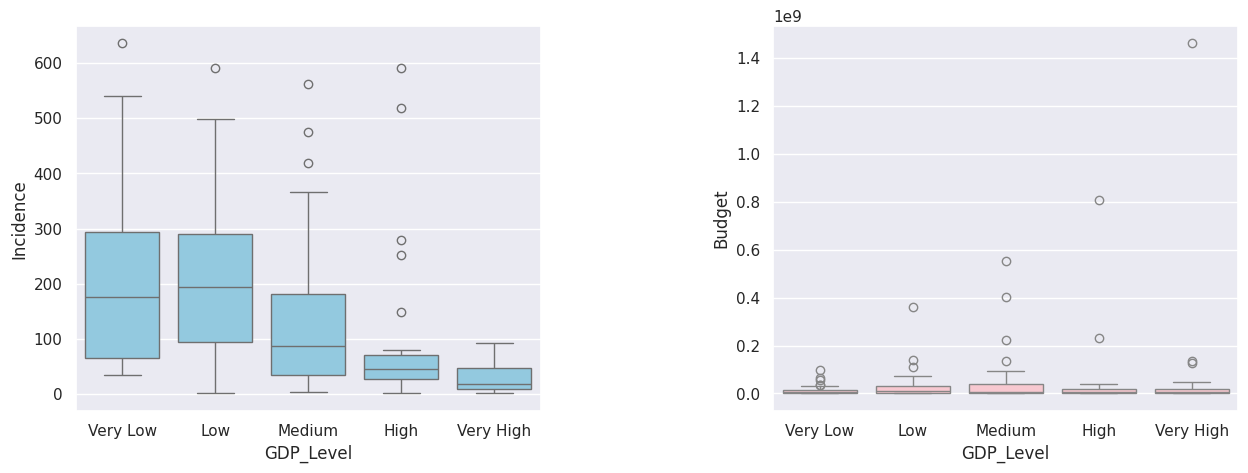

In [ ]:
# Create Boxplots
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Boxplot for 'Incidencia' by 'GDP_Level'
sns.boxplot(x='GDP_Level', y='Incidence', data=df_grouped1, color='skyblue', ax=axs[0])
axs[0].set_ylabel("Incidence")

# Boxplot for 'Budget' by 'GDP_Level'
sns.boxplot(x='GDP_Level', y='Budget', data=df_grouped1, color='pink', ax=axs[1])
axs[1].set_ylabel("Budget")

plt.subplots_adjust(wspace=0.5)
sns.set(rc={'figure.figsize':(10,5)})

plt.show()

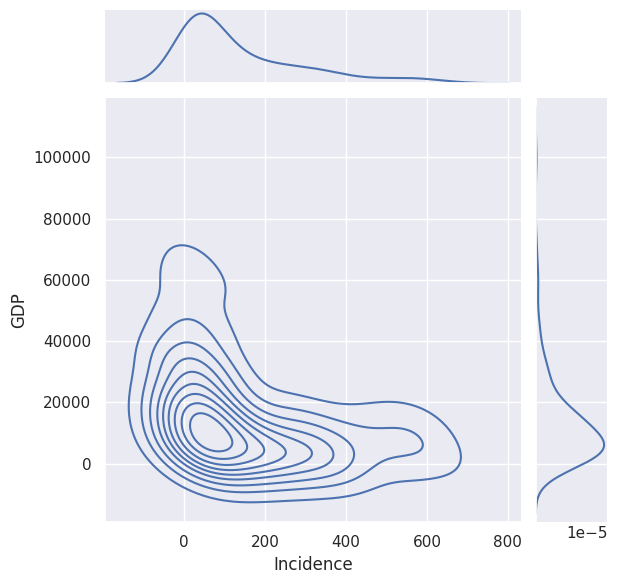

In [ ]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(data=df_grouped1, x="Incidence", y="GDP", kind="kde")
plt.show()

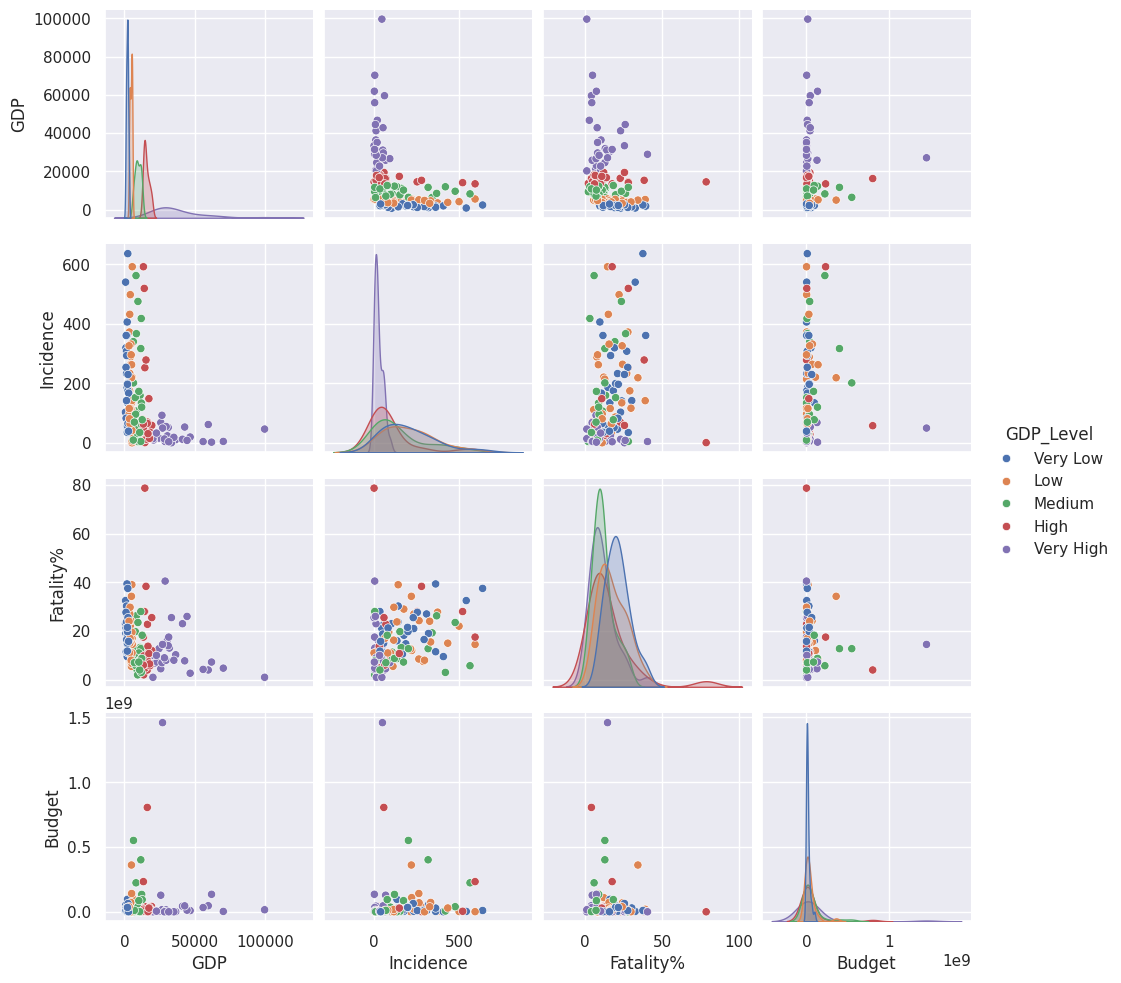

In [ ]:
# Relationship of each group
sns.pairplot(df_grouped1, hue="GDP_Level")
plt.show()

## Conclusions


- 3 dataframes were imported from 2 different web sources. Data was analyzed and different useful tools were shown to be able to extract trend values both numerically and graphically.
- A merge of the dataframes was achieved, relating variables from them and data was subdivided into labels that facilitated the interpretation of the obtained data.
- A correspondence could be visualized between the countries with the lowest GDP and their relationship with Tuberculosis. For example, with the correlation matrix filtered in poorer countries, it can be evidenced that the number of incidences and the number of deaths were correlated.
- It was visualized that the countries that invest the most in tuberculosis are those that have a medium GDP and that this investment is independent of the number of incidences.
- The Geopandas library was used as a useful tool for visualizing countries. It is an example of the many useful libraries that can be found to perform visualization tasks.
- The power of Python was shown to perform different processes of cleaning, processing, and data analysis at different levels.